### Packages!

In [3]:
#pip install numpy pandas matplotlib scikit-learn
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

### Creating data 

In [17]:
np.random.seed(42)

# Number of hashtags per category
n_per_cluster = 60

# Social media hashtag dataset
# Features (intentionally on very different scales):
#   - engagement_rate: % likes + comments + shares per post (0-100)
#   - daily_usage: posts per day using the hashtag (roughly 10 -> 60,000+)
#   - avg_reach: average impressions per post (roughly 1,000 -> 100,000)


# Cluster 1: Viral/Trending hashtags (#fyp, #viral, #trending)
# High engagement, very high daily usage, high reach
viral_engagement = np.random.normal(75, 8, n_per_cluster)
viral_usage = np.random.normal(85, 10, n_per_cluster)
viral_reach = np.random.normal(80, 12, n_per_cluster)

# Cluster 2: Niche Community hashtags (#sourdoughbakers, #vintagevinyl, #aquascaping)
# Moderate-high engagement (loyal community), low daily usage, moderate reach
niche_engagement = np.random.normal(65, 10, n_per_cluster)
niche_usage = np.random.normal(20, 8, n_per_cluster)
niche_reach = np.random.normal(30, 10, n_per_cluster)

# Cluster 3: Brand hashtags (#nike, #starbucks, #apple)
# Lower engagement (perceived as ads), high daily usage, moderate reach
brand_engagement = np.random.normal(25, 8, n_per_cluster)
brand_usage = np.random.normal(70, 12, n_per_cluster)
brand_reach = np.random.normal(55, 15, n_per_cluster)

# Cluster 4: Generic hashtags (#love, #instagood, #photooftheday)
# Moderate engagement, very high usage, moderate reach (saturated)
evergreen_engagement = np.random.normal(40, 12, n_per_cluster)
evergreen_usage = np.random.normal(95, 5, n_per_cluster)
evergreen_reach = np.random.normal(45, 10, n_per_cluster)

# Cluster 5: Event hashtags (#bostonmarathon, #sxsw, #coachella)
# High engagement (passionate attendees), moderate usage, high reach (media coverage)
event_engagement = np.random.normal(70, 10, n_per_cluster)
event_usage = np.random.normal(50, 15, n_per_cluster)
event_reach = np.random.normal(70, 12, n_per_cluster)

# Combine all clusters. We are going to group each of the metrics for each type of hashtag.
engagement = np.concatenate([viral_engagement, niche_engagement, brand_engagement, 
                             evergreen_engagement, event_engagement])
usage = np.concatenate([viral_usage, niche_usage, brand_usage, 
                        evergreen_usage, event_usage])
reach = np.concatenate([viral_reach, niche_reach, brand_reach, 
                        evergreen_reach, event_reach])

# Clip values to valid ranges (0-100)
engagement = np.clip(engagement, 0, 100)
usage = np.clip(usage, 0, 100)
reach = np.clip(reach, 0, 100)



### TODO: create data frame for visualization

In [18]:
# TODO: Create DataFrame with the format col_1 = engagement_rate, col_2 = daily_usage, col_3 = avg_reach
# Note: we intentionally put features on very different scales.
df = pd.DataFrame({
    'engagement_rate': engagement,
    'daily_usage': usage,
    'avg_reach': reach
})

# True labels (for reference, not used in clustering)
true_labels = np.repeat([0, 1, 2, 3, 4], n_per_cluster)

print(f"Dataset shape: {df.shape}")
print(f"\nDataset preview:")
df.head(10)

Dataset shape: (300, 3)

Dataset preview:


,engagement_rate,daily_usage,avg_reach
0,78.973713,80.208258,89.492383
1,73.893886,83.143410,69.087351
2,80.181508,73.936650,96.833532
3,87.184239,73.037934,63.177787
4,73.126773,93.125258,87.042285
5,73.126904,98.562400,100.000000
6,87.633703,84.279899,68.113564
7,81.139478,95.035329,73.204427
8,71.244205,88.616360,81.195816
9,79.340480,78.548802,73.958292


### Visualizing the Hashtag Data


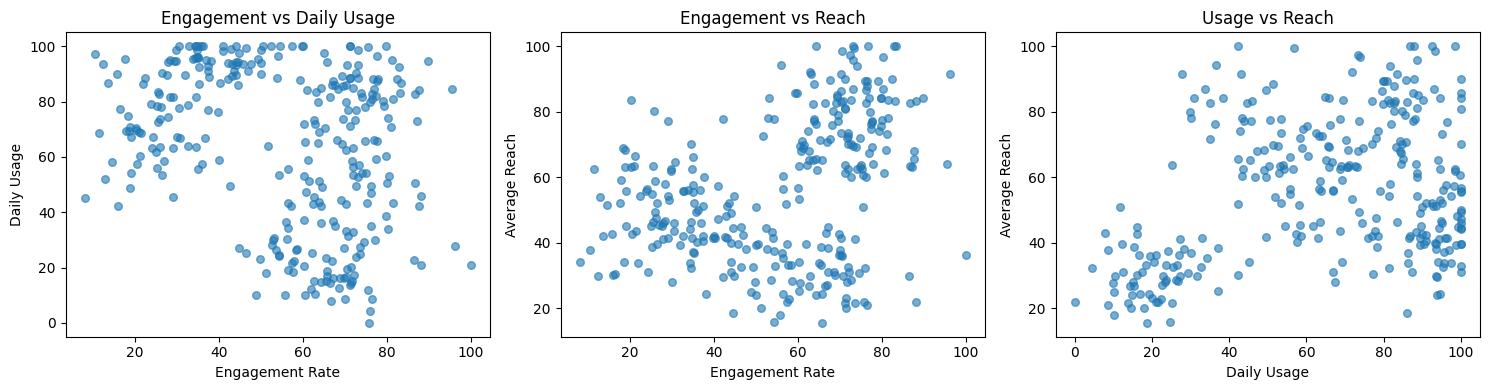

In [19]:
# 2D scatter plots to visualize the data
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# engagement vs usage
axes[0].scatter(df['engagement_rate'], df['daily_usage'], alpha=0.6, s=30)
axes[0].set_xlabel('Engagement Rate')
axes[0].set_ylabel('Daily Usage')
axes[0].set_title('Engagement vs Daily Usage')

# engagement vs reach
axes[1].scatter(df['engagement_rate'], df['avg_reach'], alpha=0.6, s=30)
axes[1].set_xlabel('Engagement Rate')
axes[1].set_ylabel('Average Reach')
axes[1].set_title('Engagement vs Reach')

#TODO: set third plot to display usage vs reach
axes[2].scatter(df['daily_usage'], df['avg_reach'], alpha=0.6, s=30)
axes[2].set_xlabel('Daily Usage')
axes[2].set_ylabel('Average Reach')
axes[2].set_title('Usage vs Reach')

plt.tight_layout()
plt.show()

### TODO: Creating the feature matrix

In [20]:
# TODO: use to_numpy method to convert df to a numpy array
X = df.to_numpy()

print(f"X shape: {X.shape}")
print(f"X type: {type(X)}")

X shape: (300, 3)
X type: <class 'numpy.ndarray'>


### TODO: Finding the optimal k using silhouette scores


In [22]:
# TODO: Compute silhouette scores for k = 2 to 10
k_range = range(2, 11)
silhouette_scores = []
inertias = []

for k in k_range:
    # TODO: Initialize KMeans with k clusters, init='k-means++', random_state=42
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    
    # TODO: Fit the model using KMeans' fit_predict method and get cluster labels
    labels = kmeans.fit_predict(X)
    
    # TODO: Calculate the silhouette score using sklearn silhouette score method (hint: see imports)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)
    
    # Also store within cluster distances for the elbow method comparison
    inertias.append(kmeans.inertia_)
    
    print(f"k={k}: Silhouette Score = {sil_score:.4f}")

k=2: Silhouette Score = 0.3968
k=3: Silhouette Score = 0.5023
k=4: Silhouette Score = 0.4763
k=5: Silhouette Score = 0.4592
k=6: Silhouette Score = 0.4340
k=7: Silhouette Score = 0.4081
k=8: Silhouette Score = 0.3614
k=9: Silhouette Score = 0.3636
k=10: Silhouette Score = 0.2917


### TODO: Visualizing silhouette scores vs elbow method


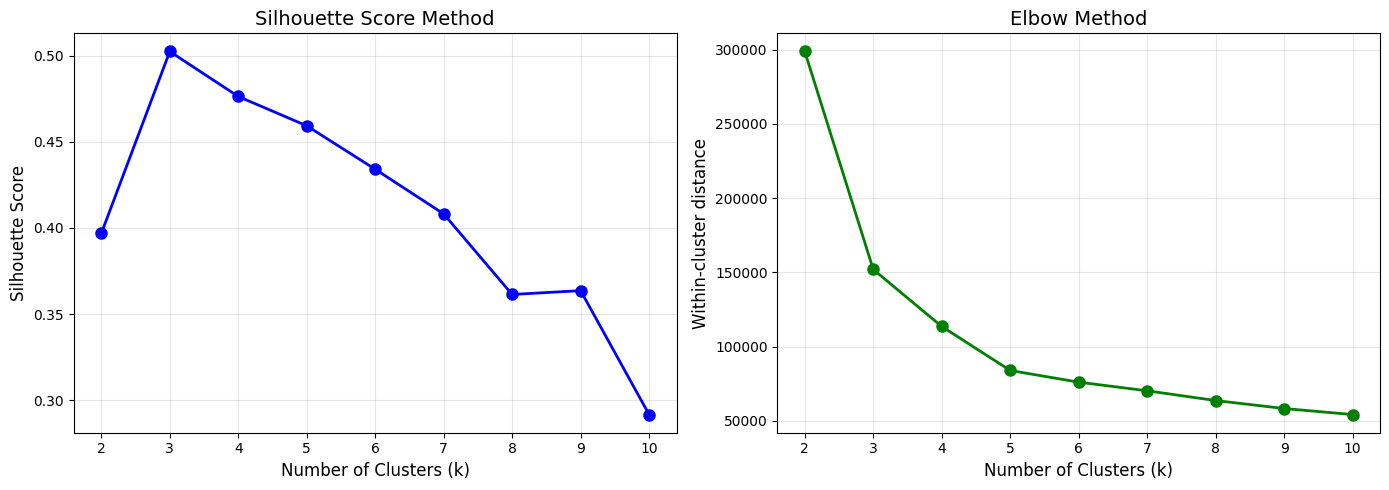

In [23]:
# Plot both methods side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Silhouette Score Plot
axes[0].plot(list(k_range), silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Silhouette Score', fontsize=12)
axes[0].set_title('Silhouette Score Method', fontsize=14)
axes[0].set_xticks(list(k_range))
axes[0].grid(True, alpha=0.3)

# TODO: Mark the k with the highest silhouette score using the silhouette_scores list from before
max_k = list(k_range)[np.argmax(silhouette_scores)]

# TODO: Find the max silhouette score
max_score = max(silhouette_scores)


# Elbow Method Plot (Within-cluster distances)
axes[1].plot(list(k_range), inertias, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Within-cluster distance', fontsize=12)
axes[1].set_title('Elbow Method', fontsize=14)
axes[1].set_xticks(list(k_range))
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Silhouette Plots for Different k Values

Silhouette plots show the silhouette coefficient for each sample, grouped by cluster. This helps us understand:
- **Cluster thickness**: How many samples are in each cluster
- **Cluster quality**: How well samples fit their clusters (wider bars = better fit)
- **Cluster consistency**: Whether all clusters have similar quality

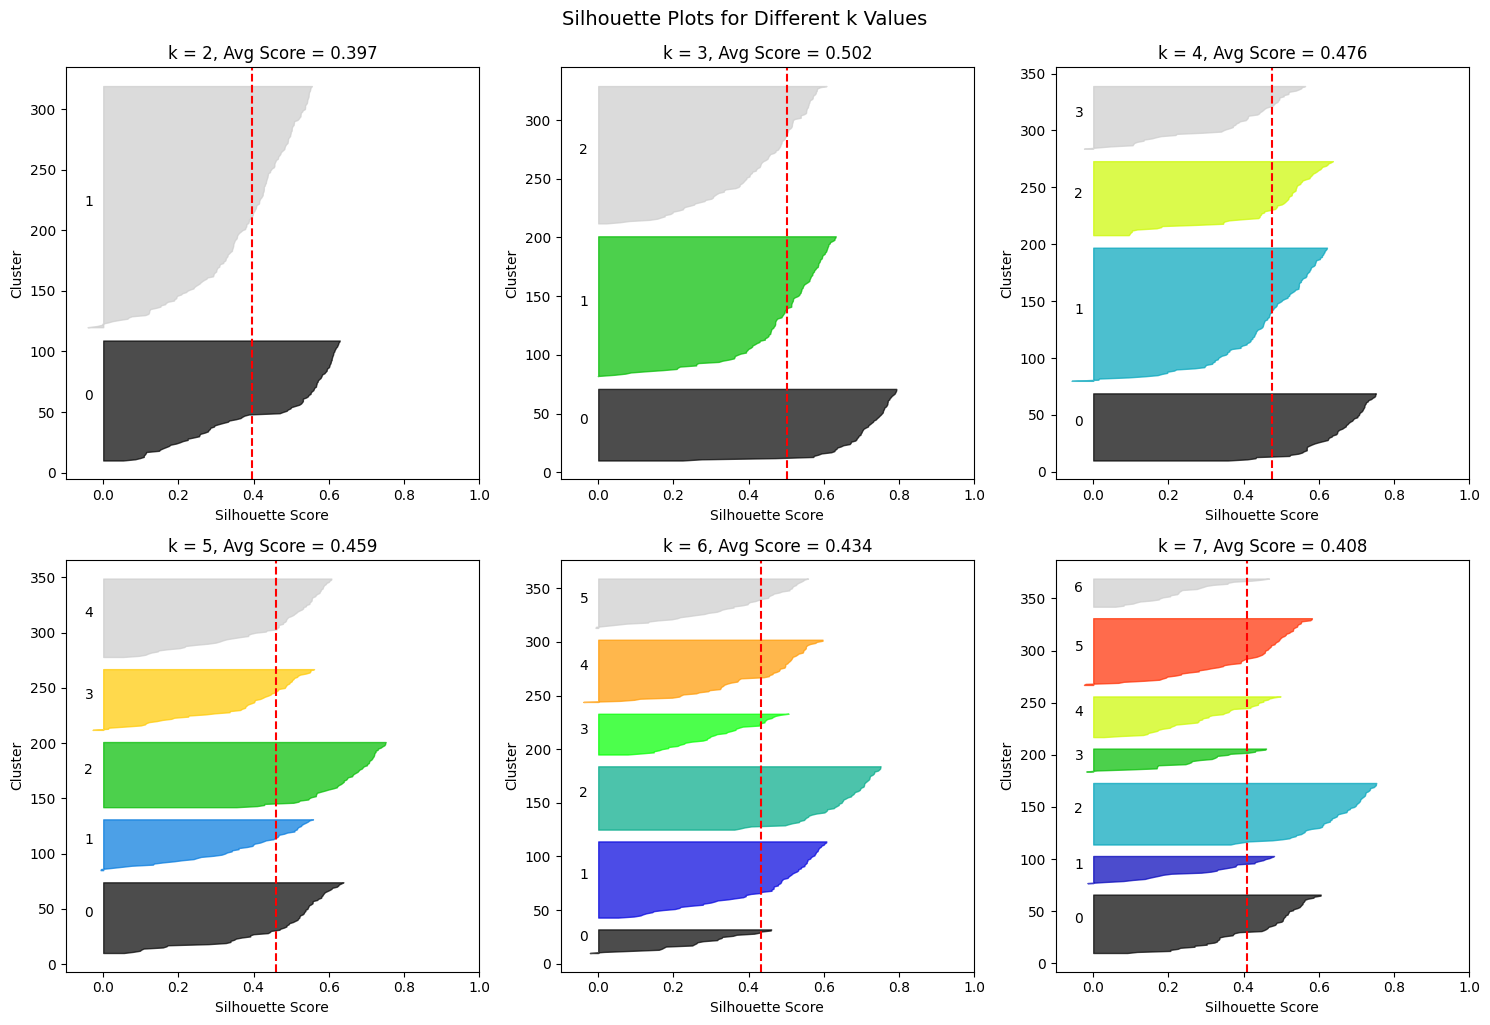

In [24]:

def plot_silhouette(X, k, ax):
    """Create a silhouette plot for k clusters."""
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)
    
    y_lower = 10
    colors = cm.nipy_spectral(np.linspace(0, 1, k))
    
    for i in range(k):
        # Get silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
        
        # Label the clusters
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_title(f"k = {k}, Avg Score = {silhouette_avg:.3f}")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster")
    
    # Draw line for average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Avg: {silhouette_avg:.3f}")
    ax.set_xlim([-0.1, 1])
    
    return silhouette_avg

# Create silhouette plots for k = 2, 3, 4, 5, 6
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

k_values = [2, 3, 4, 5, 6, 7]
for idx, k in enumerate(k_values):
    plot_silhouette(X, k, axes[idx])

plt.tight_layout()
plt.suptitle("Silhouette Plots for Different k Values", fontsize=14, y=1.02)
plt.show()

### TODO: Interpreting silhouette plots

Look at the silhouette plots above and answer:

1. Which value of k produces the most uniform cluster sizes (similar heights)?

2. Which k value has the highest average silhouette score?

3. Based on the silhouette analysis, what is the optimal k for this dataset?
